### Exercice 1.1 : Analyse de consommation énergétique

**Contexte :** Analysez les données de consommation électrique d'un bâtiment sur 60 jours.

**Consignes :**
1. Créez un graphique linéaire montrant l'évolution de la consommation quotidienne (en kWh)
2. Ajoutez une ligne horizontale pour la moyenne de consommation
3. Créez un graphique en barres de la consommation par zone du bâtiment
4. Personnalisez les titres, labels et couleurs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(123)
dates_ex = pd.date_range('2024-01-01', periods=60, freq='D')
consommation_quotidienne = np.random.randint(800, 2000, size=60) + np.sin(np.linspace(0, 4*np.pi, 60)) * 200

zones_batiment = ['Bureaux', 'Production', 'Entrepôt', 'Cafétéria', 'Parking']
consommation_zones = [15000, 22000, 12000, 18000, 8000]

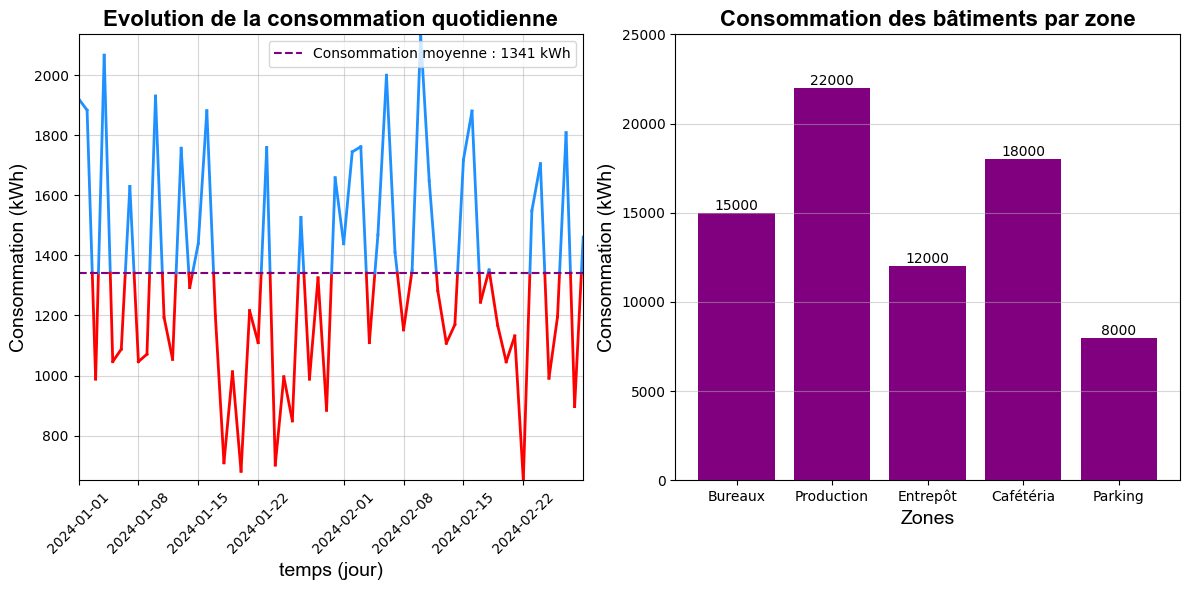

In [49]:
dictfont_title = {
    'family': 'arial',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
}

dictfont_label = {
    'family': 'arial',
    'color':  'black',
    'weight': 'normal',
    'size': 14,
}

plt.figure(figsize=(12, 6))

plt.subplot(121)

y_mean = consommation_quotidienne.mean()

for i in range(len(dates_ex) - 1):
    x0, x1 = dates_ex[i], dates_ex[i+1]
    y0, y1 = consommation_quotidienne[i], consommation_quotidienne[i+1]

    if y0 >= y_mean and y1 >= y_mean:
        plt.plot([x0, x1], [y0, y1], color="dodgerblue", linewidth=2)
    elif y0 < y_mean and y1 < y_mean:
        plt.plot([x0, x1], [y0, y1], color="red", linewidth=2)
    else:
        # intersection avec la médiane
        t = (y_mean - y0) / (y1 - y0)
        xm = x0 + t * (x1 - x0)

        plt.plot([x0, xm], [y0, y_mean],
                color="dodgerblue" if y0 >= y_mean else "red",
                linewidth=2)
        plt.plot([xm, x1], [y_mean, y1],
                color="dodgerblue" if y1 >= y_mean else "red",
                linewidth=2)

plt.axhline(y_mean, color="purple", linestyle="--", label=f"Consommation moyenne : {y_mean:.0f} kWh")

plt.title("Evolution de la consommation quotidienne", fontdict=dictfont_title)
plt.xlabel("temps (jour)", fontdict=dictfont_label)
plt.ylabel("Consommation (kWh)", fontdict=dictfont_label)
x_min = dates_ex.min()
x_max = dates_ex.max()
plt.xlim(x_min, x_max)
y_min = consommation_quotidienne.min()
y_max = consommation_quotidienne.max()
plt.ylim(y_min, y_max)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.legend()

plt.subplot(122)

hbars = plt.bar(zones_batiment, consommation_zones, color="purple")

plt.title("Consommation des bâtiments par zone", fontdict=dictfont_title)
plt.xlabel("Zones", fontdict=dictfont_label)
plt.ylabel("Consommation (kWh)", fontdict=dictfont_label)
plt.bar_label(hbars)
plt.ylim(top=25000)
plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()